In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2024-01-01'

df = yf.download('TSLA', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


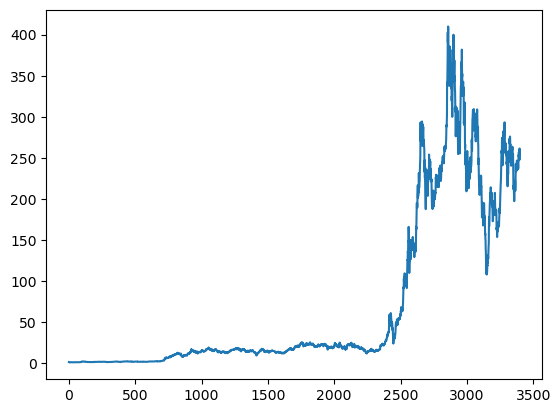

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3395,256.760010,258.220001,251.369995,252.539993,93249800
3396,254.490005,257.970001,252.910004,256.609985,86892400
3397,258.350006,263.339996,257.519989,261.440002,106494400
3398,263.660004,265.130005,252.710007,253.179993,113619900


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3395    241.505100
3396    241.477999
3397    241.553799
3398    241.571099
3399    241.558899
Name: Close, Length: 3400, dtype: float64

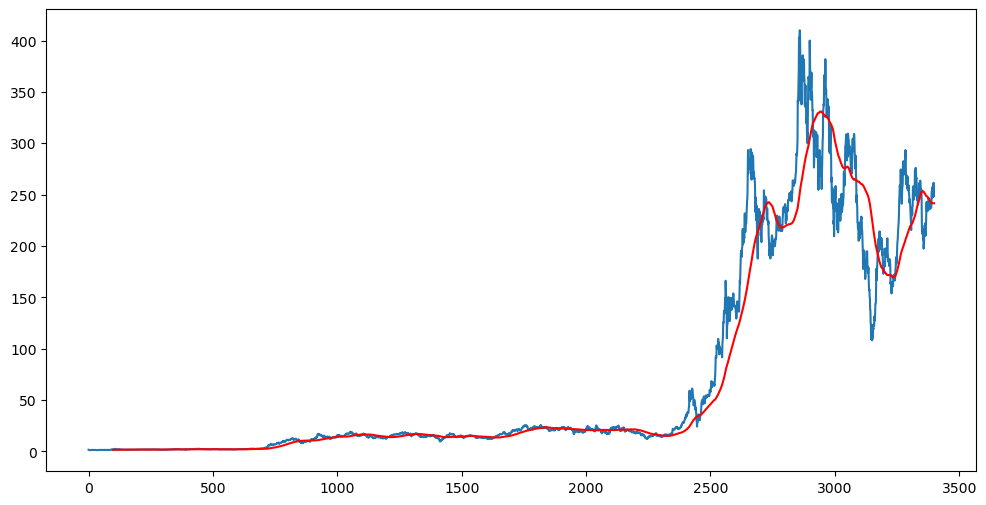

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3395    227.70775
3396    228.12360
3397    228.55840
3398    228.90800
3399    229.24815
Name: Close, Length: 3400, dtype: float64

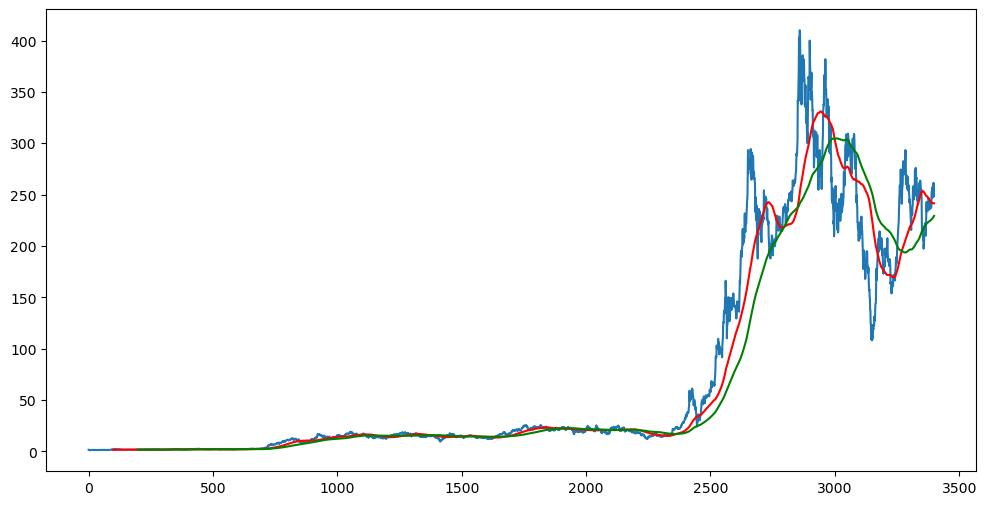

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3400, 5)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2380, 1)
(1020, 1)


In [14]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [15]:
data_testing.head()

,Close
2380,23.513332
2381,23.978666
2382,23.892668
2383,25.433332
2384,25.266001


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.86698267],
       [0.87684173],
       [0.90205848]])

In [18]:
data_training_array.shape

(2380, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2280, 100, 1)

In [21]:
# ML Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
72/72 [==============================] - 10s 116ms/step - loss: 0.0506
Epoch 2/50
72/72 [==============================] - 9s 119ms/step - loss: 0.0125
Epoch 3/50
72/72 [==============================] - 9s 120ms/step - loss: 0.0106
Epoch 4/50
72/72 [==============================] - 9s 119ms/step - loss: 0.0104
Epoch 5/50
72/72 [==============================] - 8s 116ms/step - loss: 0.0093
Epoch 6/50
72/72 [==============================] - 8s 116ms/step - loss: 0.0093
Epoch 7/50
72/72 [==============================] - 8s 116ms/step - loss: 0.0086
Epoch 8/50
72/72 [==============================] - 8s 117ms/step - loss: 0.0080
Epoch 9/50
72/72 [==============================] - 8s 117ms/step - loss: 0.0084
Epoch 10/50
72/72 [==============================] - 8s 117ms/step - loss: 0.0079
Epoch 11/50
72/72 [==============================] - 8s 116ms/step - loss: 0.0078
Epoch 12/50
72/72 [==============================] - 8s 116ms/step - loss: 0.0067
Epoch 13/50
72/72 [=====

In [27]:
model.save('keras_model.h5')

/Users/alanwong/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

,Close
2380,23.513332
2381,23.978666
2382,23.892668
2383,25.433332
2384,25.266001


In [29]:
data_training.tail(100)

,Close
2280,17.045334
2281,17.344667
2282,17.658667
2283,15.254667
2284,15.202667
...,...
2375,22.202000
2376,22.024668
2377,22.392668
2378,22.635332


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.DataFrame({'Close': past_100_days['Close'].tolist() + data_testing['Close'].tolist()})

In [32]:
final_df.head()

,Close
0,17.045334
1,17.344667
2,17.658667
3,15.254667
4,15.202667


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00745687],
       [0.008213  ],
       [0.00900617],
       ...,
       [0.62480739],
       [0.60394228],
       [0.59206991]])

In [34]:
input_data.shape

(1120, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1020, 100, 1)
(1020,)


In [37]:
# Making Predictions

y_predicted = model.predict(x_test)

32/32 [==============================] - 1s 33ms/step


In [38]:
y_predicted.shape

(1020, 1)

In [39]:
y_test

array([0.02379529, 0.02497074, 0.0247535 , ..., 0.62480739, 0.60394228,
       0.59206991])

In [40]:
y_predicted

array([[0.04624461],
       [0.04595214],
       [0.0456937 ],
       ...,
       [0.5948771 ],
       [0.59714913],
       [0.5987426 ]], dtype=float32)

In [41]:
scaler.scale_

array([0.00252604])

In [42]:
scale_factor = 1/0.00252604
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

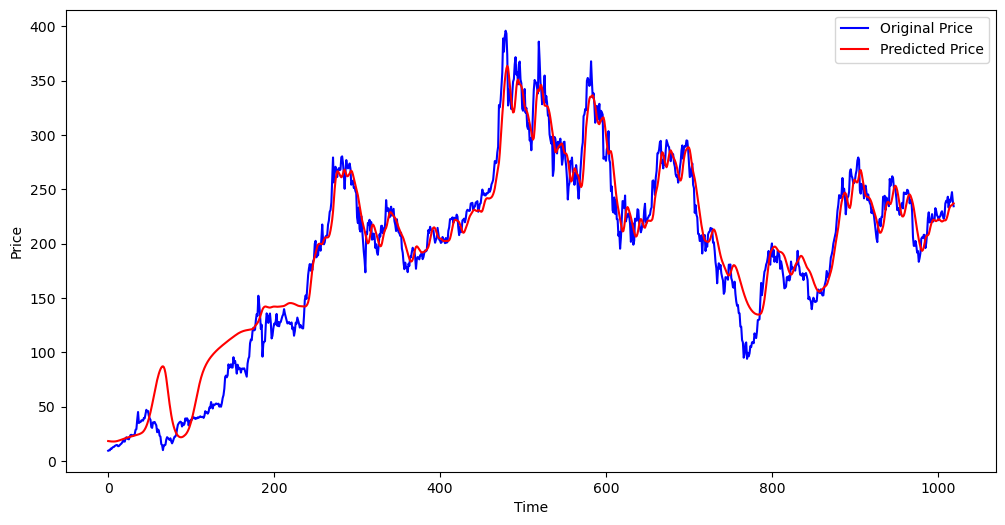

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()